In [458]:
# Run reviews_exploratiion.ipynb first.
import pandas as pd
import json
import ast
import numpy as np
import math
import missingno as msno
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer

In [389]:
# Import data.
games_returns_release_df = pd.read_csv('games_returns_release_date.csv')
games_returns_release_df.head()

,Unnamed: 0,Unnamed: 0_x,igdb_id,first_release_date,name,slug,mature,single_player,multiplayer,igdb_name,...,excess_return,NOKUSD,GBPUSD,JPYUSD,SEKUSD,PLNUSD,EURUSD,market_cap,mkt_cap_usd,volume_to_shares_outstanding
0,0,2,117,2016-12-06,The Last Guardian,the-last-guardian,False,True,False,The Last Guardian,...,-0.009487,0.119367,1.27110,0.008775,0.109537,0.240214,1.07335,4.029600e+12,3.535974e+10,4.327669e-03
1,1,2,117,2016-12-06,The Last Guardian,the-last-guardian,False,True,False,The Last Guardian,...,-0.009486,0.119367,1.27110,0.008775,0.109537,0.240214,1.07335,3.292524e+10,2.889190e+08,2.341677e-06
2,3,2506,119386,2020-11-30,Empire of Sin,empire-of-sin,True,True,False,Empire of Sin,...,0.037110,0.112910,1.33505,0.009590,0.116962,0.266809,1.19620,2.785728e+10,3.258243e+09,1.423513e-03
3,4,2506,119386,2020-11-30,Empire of Sin,empire-of-sin,True,True,False,Empire of Sin,...,0.087247,0.112910,1.33505,0.009590,0.116962,0.266809,1.19620,2.760384e+09,3.228600e+08,8.522727e-07
4,10,2514,120175,2020-02-27,One Punch Man: A Hero Nobody Knows,one-punch-man-a-hero-nobody-knows,False,True,True,One Punch Man: A Hero Nobody Knows,...,-0.001383,0.106388,1.28735,0.009092,0.103612,0.254278,1.09860,1.254300e+12,1.140410e+10,5.621171e-03


In [390]:
games_returns_release_df['hasLootBoxes'] = games_returns_release_df['hasLootBoxes'].astype(bool)

In [391]:
# Check columns for columns that can be dropped.
games_returns_release_df.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'igdb_id', 'first_release_date', 'name',
       'slug', 'mature', 'single_player', 'multiplayer', 'igdb_name',
       'opencritic_name', 'opencritic_id', 'dist', 'hasLootBoxes',
       'percentRecommended', 'numReviews', 'numTopCriticReviews',
       'medianScore', 'topCriticScore', 'percentile', 'firstReleaseDate',
       'firstReviewDate', 'latestReviewDate', 'variable', 'igdb_company_id',
       'developer', 'publisher', 'stock_id', 'date', 'Unnamed: 0_y', 'gvkey',
       'iid', 'company_name', 'shares_outstanding', 'trading_volume',
       'closing_price', 'total_return_factor', 'eu', 'jp', 'us', 'mkt-rf',
       'smb', 'hml', 'rmw', 'cma', 'rf', 'benchmark_price', 'returns',
       'benchmark_returns', 'excess_return', 'NOKUSD', 'GBPUSD', 'JPYUSD',
       'SEKUSD', 'PLNUSD', 'EURUSD', 'market_cap', 'mkt_cap_usd',
       'volume_to_shares_outstanding'],
      dtype='object')

In [392]:
games_returns_release_df.dtypes

Unnamed: 0                        int64
Unnamed: 0_x                      int64
igdb_id                           int64
first_release_date               object
name                             object
slug                             object
mature                             bool
single_player                      bool
multiplayer                        bool
igdb_name                        object
opencritic_name                  object
opencritic_id                     int64
dist                            float64
hasLootBoxes                       bool
percentRecommended              float64
numReviews                      float64
numTopCriticReviews             float64
medianScore                     float64
topCriticScore                  float64
percentile                      float64
firstReleaseDate                 object
firstReviewDate                  object
latestReviewDate                 object
variable                         object
igdb_company_id                   int64


In [393]:
# Drop unused columns.
games_returns_release_df = games_returns_release_df.drop([
    'Unnamed: 0',
    'Unnamed: 0_x',
    'slug',
    'Unnamed: 0_y',
    'gvkey',
    'shares_outstanding',
    'total_return_factor',
    'variable',
    'igdb_name',
    'opencritic_id',
    'first_release_date',
    'benchmark_returns'
    ], axis=1)

games_returns_release_df.head()

,igdb_id,name,mature,single_player,multiplayer,opencritic_name,dist,hasLootBoxes,percentRecommended,numReviews,...,excess_return,NOKUSD,GBPUSD,JPYUSD,SEKUSD,PLNUSD,EURUSD,market_cap,mkt_cap_usd,volume_to_shares_outstanding
0,117,The Last Guardian,False,True,False,The Last Guardian,0.0,False,70.491803,128.0,...,-0.009487,0.119367,1.27110,0.008775,0.109537,0.240214,1.07335,4.029600e+12,3.535974e+10,4.327669e-03
1,117,The Last Guardian,False,True,False,The Last Guardian,0.0,False,70.491803,128.0,...,-0.009486,0.119367,1.27110,0.008775,0.109537,0.240214,1.07335,3.292524e+10,2.889190e+08,2.341677e-06
2,119386,Empire of Sin,True,True,False,Empire of Sin,0.0,False,27.118644,60.0,...,0.037110,0.112910,1.33505,0.009590,0.116962,0.266809,1.19620,2.785728e+10,3.258243e+09,1.423513e-03
3,119386,Empire of Sin,True,True,False,Empire of Sin,0.0,False,27.118644,60.0,...,0.087247,0.112910,1.33505,0.009590,0.116962,0.266809,1.19620,2.760384e+09,3.228600e+08,8.522727e-07
4,120175,One Punch Man: A Hero Nobody Knows,False,True,True,One-Punch Man: A Hero Nobody Knows,0.0,False,17.105263,76.0,...,-0.001383,0.106388,1.28735,0.009092,0.103612,0.254278,1.09860,1.254300e+12,1.140410e+10,5.621171e-03


In [394]:
games_returns_release_df[['mature',
                          'single_player', 
                          'multiplayer', 
                          'hasLootBoxes', 
                          'developer',
                          'publisher',
                          'eu',
                          'jp',
                          'us']] = games_returns_release_df[['mature',
                          'single_player', 
                          'multiplayer', 
                          'hasLootBoxes', 
                          'developer',
                          'publisher',
                          'eu',
                          'jp',
                          'us']].astype(int)

<Axes: >

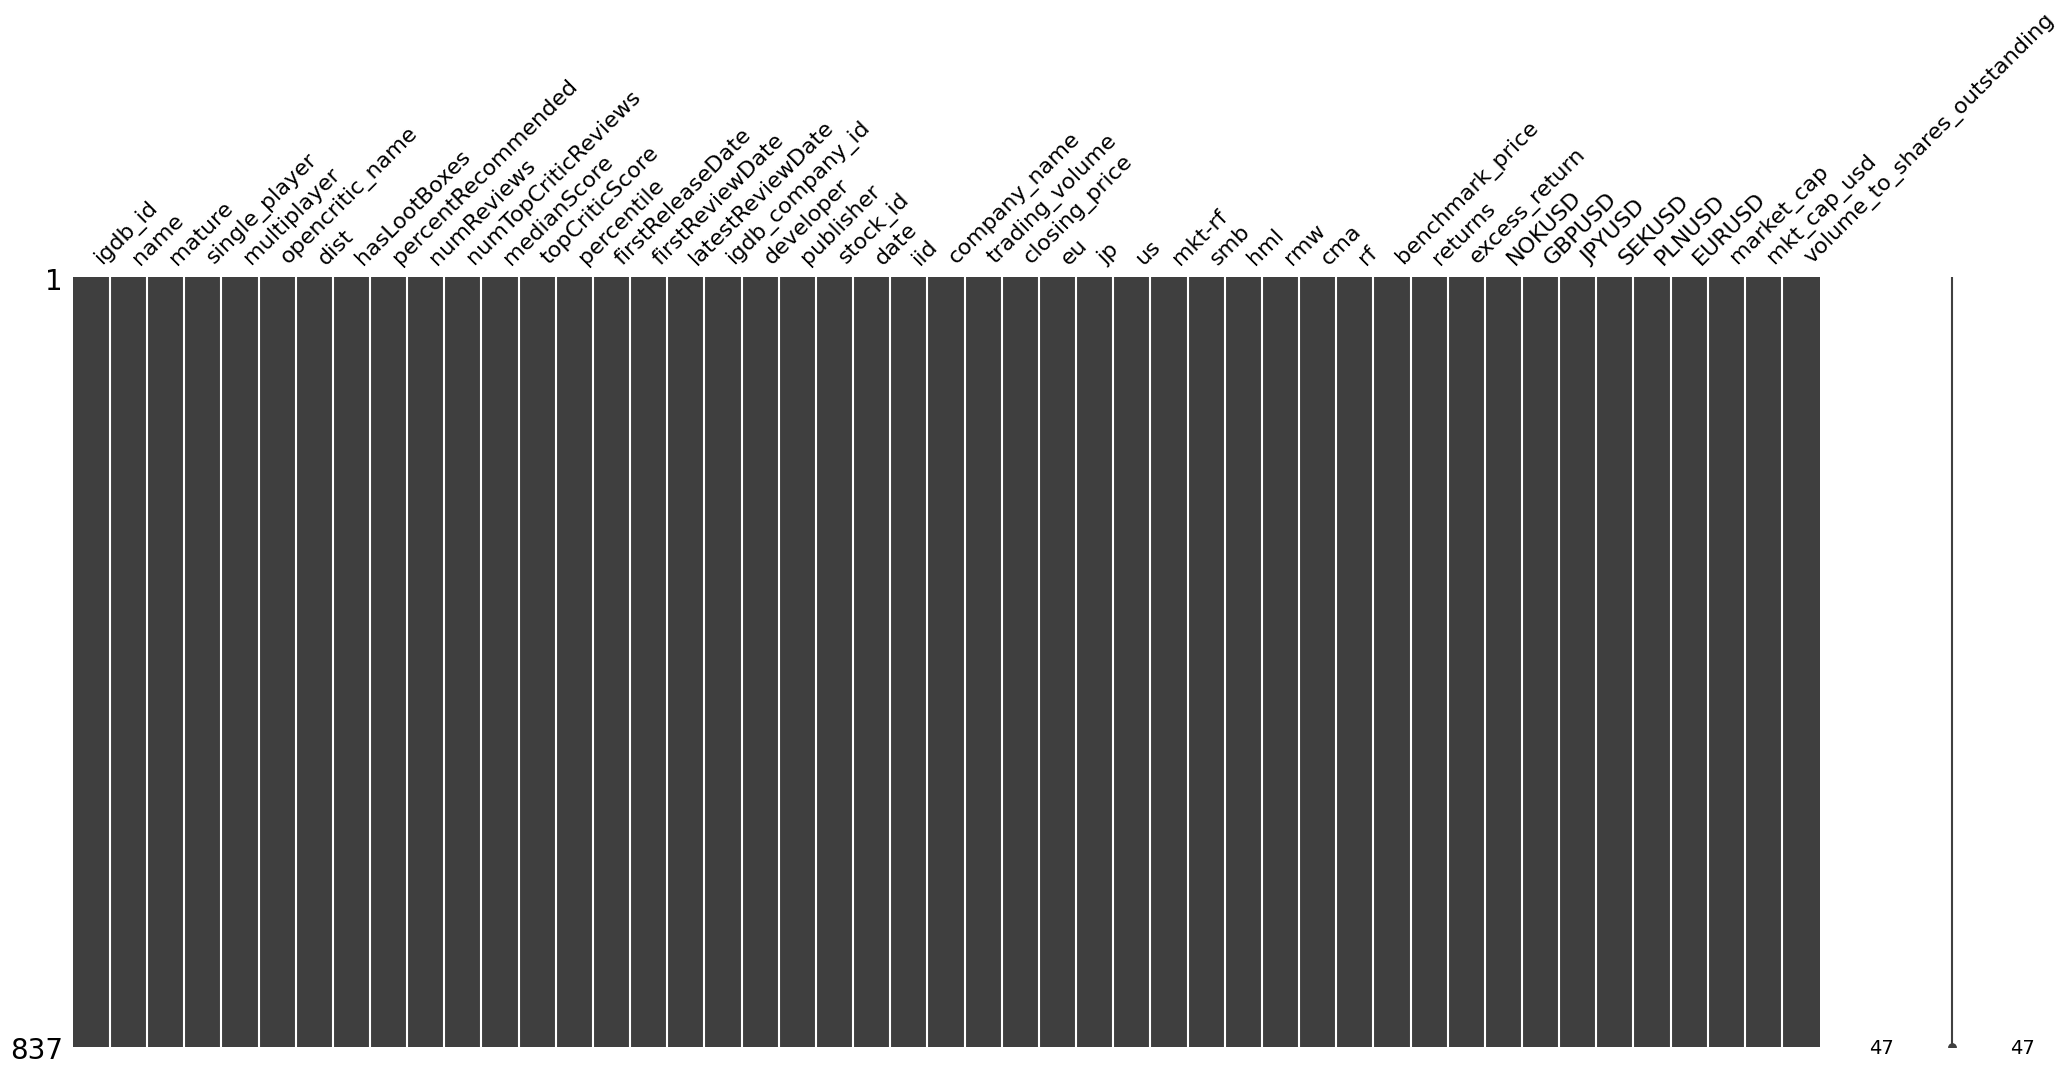

In [395]:
# Plot missing data.
%matplotlib inline

msno.matrix(games_returns_release_df)

In [396]:
def run_ols_model(df, dependent_var, independent_vars):
    X = df[independent_vars]
    Y = df[dependent_var]
    
    X = sm.add_constant(X)
    
    model = sm.OLS(Y, X).fit()
    predictions = model.predict(X)
    
    return model.summary()

In [397]:
games_returns_release_df.columns

Index(['igdb_id', 'name', 'mature', 'single_player', 'multiplayer',
       'opencritic_name', 'dist', 'hasLootBoxes', 'percentRecommended',
       'numReviews', 'numTopCriticReviews', 'medianScore', 'topCriticScore',
       'percentile', 'firstReleaseDate', 'firstReviewDate', 'latestReviewDate',
       'igdb_company_id', 'developer', 'publisher', 'stock_id', 'date', 'iid',
       'company_name', 'trading_volume', 'closing_price', 'eu', 'jp', 'us',
       'mkt-rf', 'smb', 'hml', 'rmw', 'cma', 'rf', 'benchmark_price',
       'returns', 'excess_return', 'NOKUSD', 'GBPUSD', 'JPYUSD', 'SEKUSD',
       'PLNUSD', 'EURUSD', 'market_cap', 'mkt_cap_usd',
       'volume_to_shares_outstanding'],
      dtype='object')

In [398]:
x_df = games_returns_release_df[['mature',
                                'single_player', 
                                'multiplayer', 
                                'hasLootBoxes', 
                                'medianScore',
                                'developer',
                                'publisher',
                                'eu',
                                'jp',
                                'us',
                                'mkt-rf',
                                'smb',
                                'hml',
                                'rmw',
                                'cma',
                                'rf',
                                'mkt_cap_usd']]
x_df.dtypes

mature             int64
single_player      int64
multiplayer        int64
hasLootBoxes       int64
medianScore      float64
developer          int64
publisher          int64
eu                 int64
jp                 int64
us                 int64
mkt-rf           float64
smb              float64
hml              float64
rmw              float64
cma              float64
rf               float64
mkt_cap_usd      float64
dtype: object

In [399]:
results_hic = run_ols_model(games_returns_release_df[(games_returns_release_df['excess_return'] < 3.5) & (games_returns_release_df['numReviews'] > 0)], 'medianScore', ['mature',
                                                   'single_player', 
                                                   'multiplayer', 
                                                   #'hasLootBoxes', 
                                                   'developer',
                                                   'publisher',
                                                   'eu',
                                                   'jp',
                                                   'us',
                                                   'mkt-rf',
                                                   'smb',
                                                   'hml',
                                                   'rmw',
                                                   'cma',
                                                   'rf',
                                                   'mkt_cap_usd'])
print(results_hic)

                            OLS Regression Results                            
Dep. Variable:            medianScore   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     4.878
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           2.84e-08
Time:                        18:15:41   Log-Likelihood:                -3183.2
No. Observations:                 836   AIC:                             6394.
Df Residuals:                     822   BIC:                             6461.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            36.4798      1.190     30.662

In [456]:
def subplot_common_y(df, dependent_var, independent_vars, num_columns, y_label, **kwargs):

    titles = kwargs.get('titles', None)
    x_labels = kwargs.get('x_labels', None)
    y = df[dependent_var]
    suptitle = kwargs.get('suptitle', None)
    colours=kwargs.get('colours')

    # Calculate the number of subplots based on how many X values being compared.
    num_subplots = len(independent_vars)

    rows = math.ceil(num_subplots/num_columns)
    cols = num_columns
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize = (9, 9))
    fig.suptitle(suptitle)

    for i, ax in enumerate(fig.axes):
        try:
            x = df[independent_vars[i]]
            ax.scatter(x, y, s=20, alpha=0.1, edgecolors="k", c='gray')
            if titles != None:
                ax.set_title(titles[i])
            if x_labels != None:
                ax.set_xlabel(x_labels[i])
            if i == 0 or i == 3:
                ax.set_ylabel(y_label)
            b, a = np.polyfit(x, y, deg=1)

            # Create sequence of 100 numbers from 0 to 100 
            xseq = np.linspace(0, max(x), num=100)

            # Plot regression line
            ax.plot(xseq, a + b * xseq, color="r", lw=1)

        except KeyError:
            print('Too many indices.')
            continue
    fig.savefig('review_metrics_regression_plots.png')


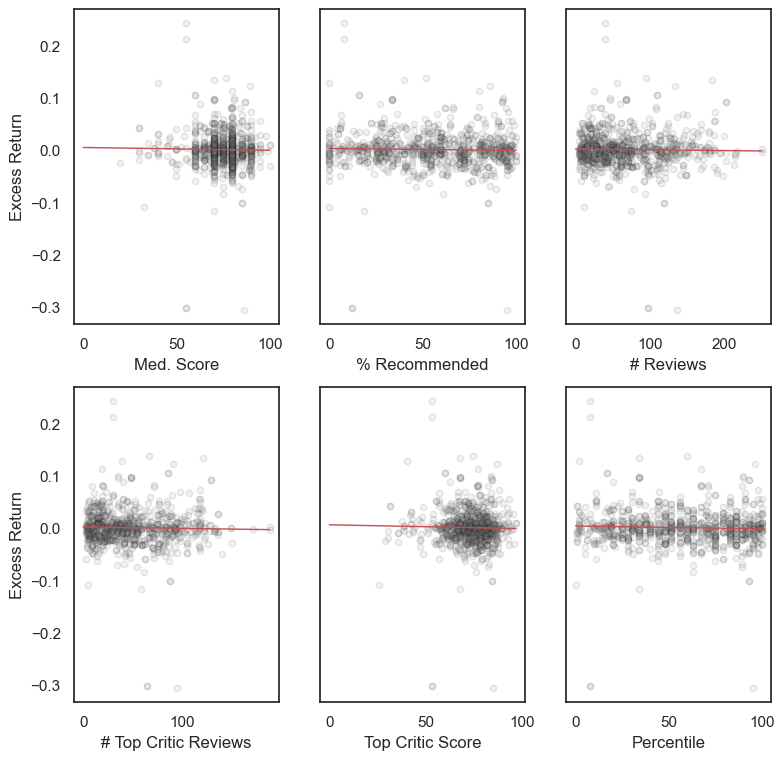

In [457]:
subplot_common_y(
    df=games_returns_release_df[(games_returns_release_df['excess_return'] < 3.5) & (games_returns_release_df['numReviews'] > 3)],
    dependent_var='excess_return',
    independent_vars=[
        'medianScore',
        'percentRecommended',
        'numReviews',
        'numTopCriticReviews',
        'topCriticScore',
        'percentile'
        ],
    num_columns=3,
    x_labels =[
        'Med. Score',
        '% Recommended',
        '# Reviews',
        '# Top Critic Reviews',
        'Top Critic Score',
        'Percentile'
        ],
    y_label='Excess Return'
  )

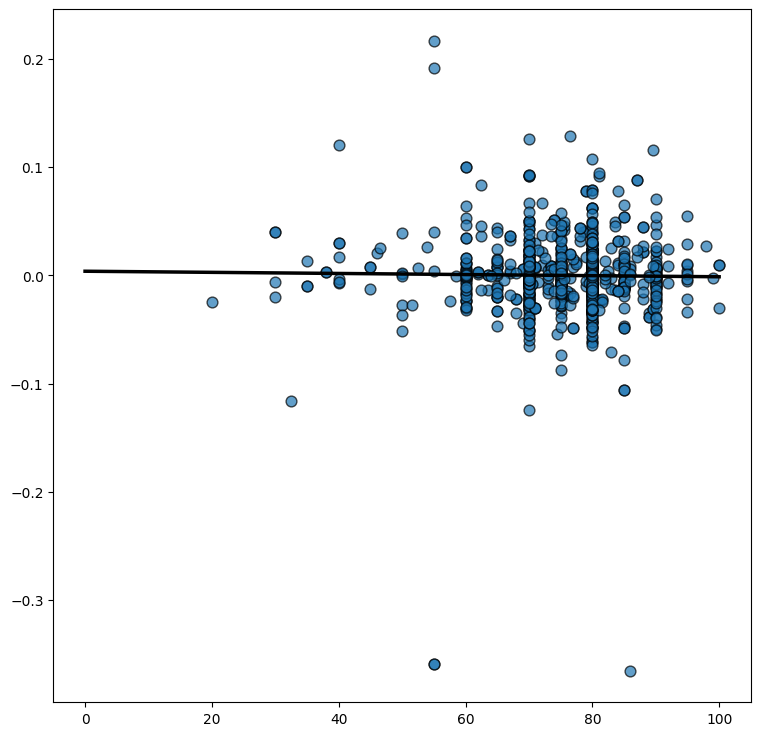

In [402]:
# Generate data
data_df = games_returns_release_df[(games_returns_release_df['excess_return'] < 3.5) & (games_returns_release_df['numReviews'] > 10)]
x = data_df['medianScore']
y = np.log(data_df['excess_return'] + 1)

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, max(x), num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

In [420]:
corr_matrix = games_returns_release_df[['mature',
                          'single_player', 
                          'multiplayer', 
                          'hasLootBoxes', 
                          'medianScore',
                          'percentRecommended',
                          'numReviews',
                          'numTopCriticReviews',
                          'topCriticScore',
                          'percentile',
                          'developer',
                          'publisher',
                          'eu',
                          'jp',
                          'us',
                          'mkt-rf',
                          'smb',
                          'hml',
                          'rmw',
                          'cma',
                          'rf',
                          'mkt_cap_usd',
                          'volume_to_shares_outstanding',
                          'excess_return']].corr()

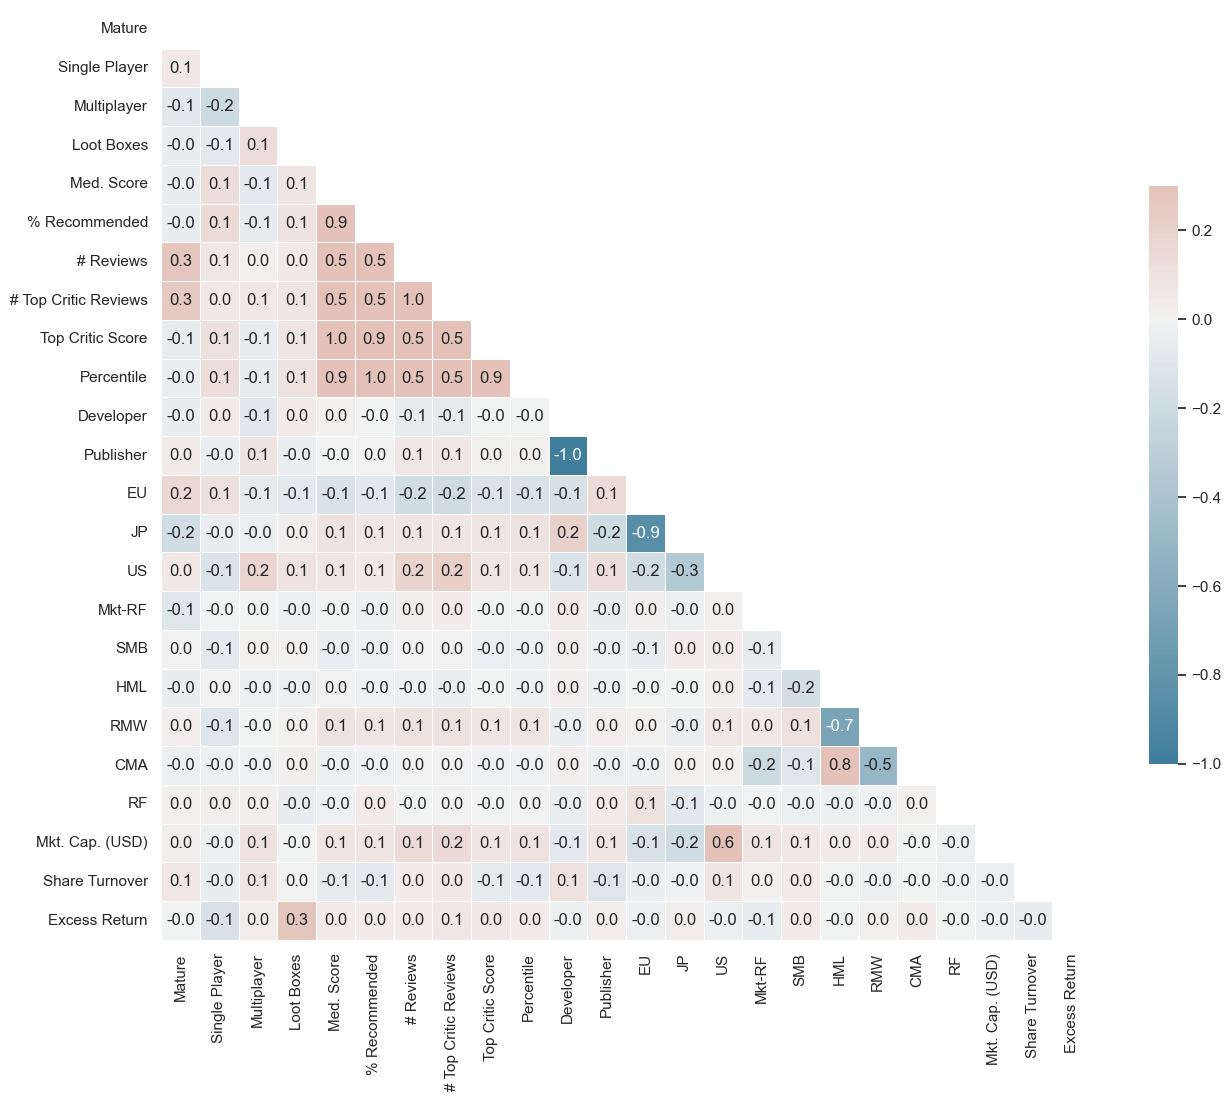

In [434]:
sns.set_theme(style="white")

label = [
        'Mature',
        'Single Player',
        'Multiplayer',
        'Loot Boxes',
        'Med. Score',
        '% Recommended',
        '# Reviews',
        '# Top Critic Reviews',
        'Top Critic Score',
        'Percentile',
        'Developer',
        'Publisher',
        'EU',
        'JP',
        'US',
        'Mkt-RF',
        'SMB',
        'HML',
        'RMW',
        'CMA',
        'RF',
        'Mkt. Cap. (USD)',
        'Share Turnover',
        'Excess Return'
        ]
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap=cmap,
    vmax=.3,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    xticklabels=label,
    yticklabels=label,
    annot=True,
    fmt=".1f"
      )
f.savefig('correlation_matrix_heatmap.png')

In [435]:
def subplot_hist(df, variables, num_columns, x_labels, share_y_axis, image_name, **kwargs):

    titles = kwargs.get('titles', None)
    suptitle = kwargs.get('suptitle', None)
    num_bins = kwargs.get('bins', None)
    figure_size = kwargs.get('figure_size', None)
    y_label_plots = kwargs.get('y_label_plots', None)

    if not figure_size:
        figure_size = (9,9)

    # Calculate the number of subplots based on how many X values being compared.
    num_subplots = len(variables)

    # Calculate how many rows there should be per column.
    rows = math.ceil(num_subplots/num_columns)
    # Number of columns provided as an input.
    cols = num_columns
    fig, axs = plt.subplots(rows, cols, sharey=share_y_axis, figsize = figure_size)
    if rows*cols> num_subplots:
        fig.delaxes(axs.flatten()[-1])
    if suptitle:
        fig.suptitle(suptitle)

    for i, ax in enumerate(axs.flat):
        try:
            if i > num_subplots -1 :
                continue
            bin_size = (max(df[variables[i]]) - min(df[variables[i]]))/num_bins
            y = df[variables[i]]
            sns.histplot(
                y,
                kde=True,
                ax=ax,
                binwidth=bin_size,
                edgecolor='black',
                color='gray')
            if titles != None:
                ax.set_title(titles[i])
            if x_labels != None:
                ax.set_xlabel(x_labels[i])
            if y_label_plots:
                if i in y_label_plots:
                    ax.set_ylabel('Count')
                else:
                    ax.set_ylabel('')

        except KeyError:
            print('Too many indices.')
            continue
    fig.savefig(image_name) 

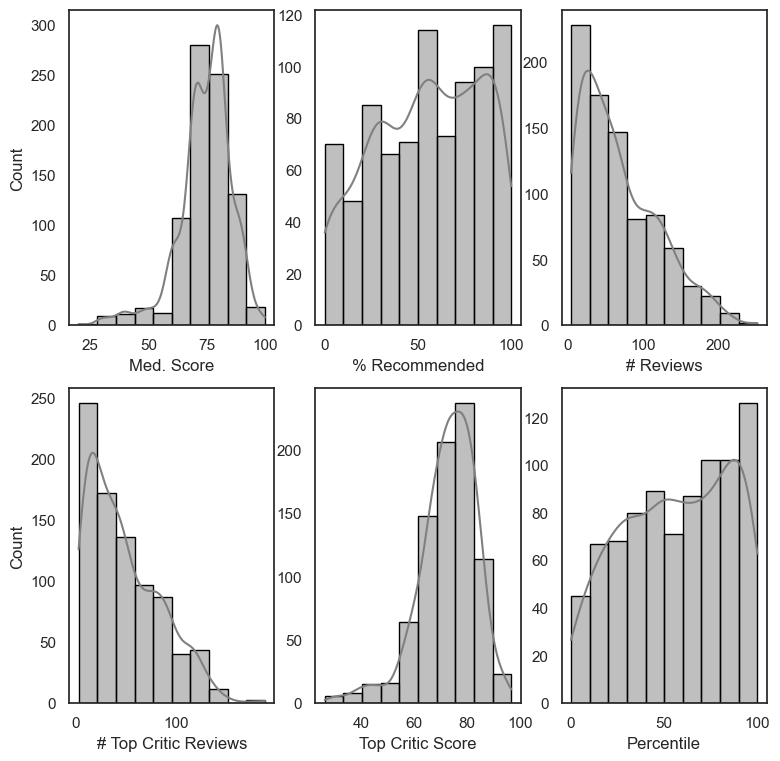

In [438]:
# Plot histograms of review metrics.
subplot_hist(
    df=games_returns_release_df,
    variables=[
        'medianScore',
        'percentRecommended',
        'numReviews',
        'numTopCriticReviews',
        'topCriticScore',
        'percentile'
        ],
    num_columns=3,
    x_labels=[
        'Med. Score',
        '% Recommended',
        '# Reviews',
        '# Top Critic Reviews',
        'Top Critic Score',
        'Percentile'
        ],
    share_y_axis=False,
    bins=10,
    image_name='review_metrics_distributions.png',
    y_label_plots=[0,3]
    )

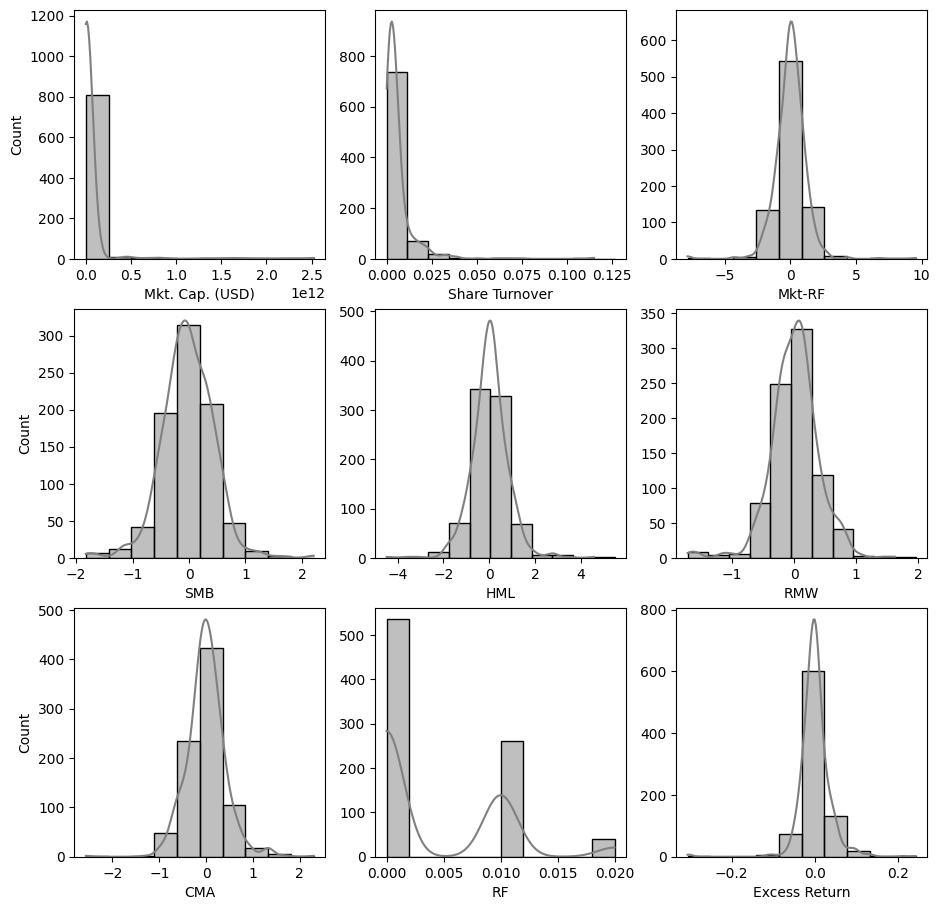

In [406]:
# Plot histograms of review metrics.
subplot_hist(
    df=games_returns_release_df[games_returns_release_df['excess_return'] < 3.0],
    variables=[
        'mkt_cap_usd',
        'volume_to_shares_outstanding',
        'mkt-rf',
        'smb',
        'hml',
        'rmw',
        'cma',
        'rf',
        'excess_return'
        ],
    num_columns=3,
    x_labels=[
        'Mkt. Cap.',
        'Share Turnover',
        'Mkt-RF',
        'SMB',
        'HML',
        'RMW',
        'CMA',
        'RF',
        'Excess Return'
        ],
    share_y_axis=False,
    bins=10,
    image_name='financial_metrics_distributions.png',
    figure_size = (11,11),
    y_label_plots=[0,3,6]
    )

In [407]:
games_returns_release_df.columns

Index(['igdb_id', 'name', 'mature', 'single_player', 'multiplayer',
       'opencritic_name', 'dist', 'hasLootBoxes', 'percentRecommended',
       'numReviews', 'numTopCriticReviews', 'medianScore', 'topCriticScore',
       'percentile', 'firstReleaseDate', 'firstReviewDate', 'latestReviewDate',
       'igdb_company_id', 'developer', 'publisher', 'stock_id', 'date', 'iid',
       'company_name', 'trading_volume', 'closing_price', 'eu', 'jp', 'us',
       'mkt-rf', 'smb', 'hml', 'rmw', 'cma', 'rf', 'benchmark_price',
       'returns', 'excess_return', 'NOKUSD', 'GBPUSD', 'JPYUSD', 'SEKUSD',
       'PLNUSD', 'EURUSD', 'market_cap', 'mkt_cap_usd',
       'volume_to_shares_outstanding'],
      dtype='object')

In [408]:
def subplot_bar(df, variables, num_columns, x_labels, legend_labels, **kwargs):

    titles = kwargs.get('titles', None)
    suptitle = kwargs.get('suptitle', None)
    colours = kwargs.get('colours', None)
    bar_labels = kwargs.get('bar_labels', None)
    figure_size = kwargs.get('figure_size', None)
    y_label_plots = kwargs.get('y_label_plots', None)

    if not figure_size:
        figure_size = (9,9)

    # Calculate the number of subplots based on how many X values being compared.
    num_subplots = len(variables)

    rows = math.ceil(num_subplots/num_columns)
    cols = num_columns
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize = (10, 6))
    if rows*cols> num_subplots:
        fig.delaxes(axs.flatten()[-1])

    if suptitle != None:
        fig.suptitle(suptitle)

    for i, ax in enumerate(fig.axes):
        try:
            y = df[variables[i]]
            if colours != None:
                p = ax.bar(
                    bar_labels[i],
                    y.value_counts(),
                    label=legend_labels[i],
                    colors=colours[i]
                )
                ax.bar_label(p, label_type='center')
            else:
                p = ax.bar(
                    bar_labels[i],
                    y.value_counts(),
                    label=legend_labels[i],
                    color=(0.1, 0.1, 0.1, 0.1),
                    edgecolor='k'
                )
                ax.bar_label(p, label_type='center')
            if titles != None:
                ax.set_title(titles[i])
            if x_labels != None:
                ax.set_xlabel(x_labels[i])
            if y_label_plots:
                if i in y_label_plots:
                    ax.set_ylabel('Count')
                else:
                    ax.set_ylabel('')

        except KeyError:
            print('Too many indices.')
            continue

    fig.savefig('games_categorical_barchart.png') 

In [409]:
def add_region_name(eu_bool, jp_bool, us_bool):
    if eu_bool:
        return 'eu'
    elif jp_bool:
        return 'jp'
    else:
        return 'us'

In [410]:
def add_dev_pub(dev_bool, pub_bool):
    if dev_bool:
        return 'developer'
    elif pub_bool:
        return 'publisher'
    else:
        return 'neither'

In [411]:
def add_mature(mature_bool):
    if mature_bool:
        return 'mature'
    elif not mature_bool:
        return 'other'
    else:
        return 'neither'

In [412]:
def add_multiplayer(multi_bool):
    if multi_bool:
        return 'Multiplayer'
    else:
        return 'Single Player'

In [413]:
games_returns_release_df['region'] = games_returns_release_df.apply(lambda x: add_region_name(eu_bool=x['eu'], jp_bool=x['jp'], us_bool=x['us']), axis=1)
games_returns_release_df['dev_pub'] = games_returns_release_df.apply(lambda x: add_dev_pub(dev_bool=x['developer'], pub_bool=x['publisher']), axis=1)
games_returns_release_df['age_rating'] = games_returns_release_df['mature'].map(add_mature)
games_returns_release_df['players'] = games_returns_release_df['multiplayer'].map(add_multiplayer)

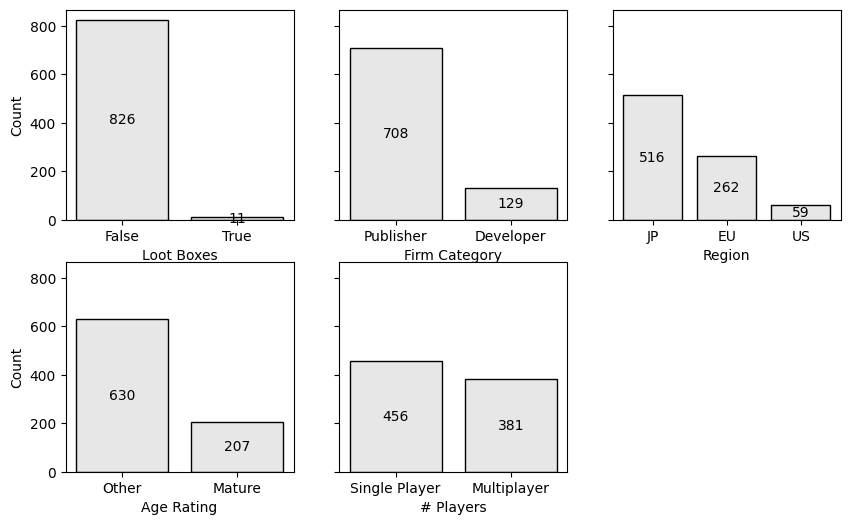

In [414]:
subplot_bar(
    df=games_returns_release_df,
    variables=[
        'hasLootBoxes',
        'dev_pub',
        'region',
        'age_rating',
        'players'
    ],
    num_columns=3,
    x_labels=[
        'Loot Boxes',
        'Firm Category',
        'Region',
        'Age Rating',
        '# Players'
    ],
    legend_labels=[
        'Loot Boxes',
        'Firm Category',
        'Region',
        'Age Rating',
        '# Players'
    ],
    bar_labels=[
        ['False', 'True'],
        ['Publisher', 'Developer'],
        ['JP', 'EU', 'US'],
        ['Other', 'Mature'],
        ['Single Player', 'Multiplayer']
    ],
    figure_size=(11,11),
    y_label_plots=[0,3]
    )

In [415]:
games_returns_release_df[(games_returns_release_df['single_player'] == True) & (games_returns_release_df['multiplayer'] == True)]

,igdb_id,name,mature,single_player,multiplayer,opencritic_name,dist,hasLootBoxes,percentRecommended,numReviews,...,SEKUSD,PLNUSD,EURUSD,market_cap,mkt_cap_usd,volume_to_shares_outstanding,region,dev_pub,age_rating,players
4,120175,One Punch Man: A Hero Nobody Knows,0,1,1,One-Punch Man: A Hero Nobody Knows,0.0,0,17.105263,76.0,...,0.103612,0.254278,1.09860,1.254300e+12,1.140410e+10,0.005621,jp,publisher,other,Multiplayer
7,120436,One Piece: Pirate Warriors 4,0,1,1,One Piece: Pirate Warriors 4,0.0,0,65.789474,76.0,...,0.100535,0.242366,1.10240,3.285994e+11,3.001755e+09,0.002246,jp,developer,other,Multiplayer
8,120436,One Piece: Pirate Warriors 4,0,1,1,One Piece: Pirate Warriors 4,0.0,0,65.789474,76.0,...,0.100535,0.242366,1.10240,1.187034e+12,1.084356e+10,0.005351,jp,publisher,other,Multiplayer
12,121223,Zumba: Burn it Up!,0,1,1,Zumba: Burn it Up!,0.0,0,60.000000,5.0,...,0.103712,0.258121,1.10795,1.962291e+08,2.174121e+08,0.025272,eu,publisher,other,Multiplayer
13,121223,Zumba: Burn it Up!,0,1,1,Zumba: Burn it Up!,0.0,0,60.000000,5.0,...,0.103712,0.258121,1.10795,1.933769e+08,2.142520e+08,0.000260,eu,publisher,other,Multiplayer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,26341,Dragon Quest Heroes II,0,1,1,Dragon Quest Heroes 2,0.0,0,62.500000,72.0,...,0.119954,0.253624,1.11315,4.335517e+11,3.946621e+09,0.011383,jp,publisher,other,Multiplayer
829,191931,Pokémon Scarlet,0,1,1,Pokémon Scarlet & Violet,0.0,0,47.154472,127.0,...,0.094370,0.220342,1.03615,7.688245e+12,5.496326e+10,0.004783,jp,publisher,other,Multiplayer
831,191930,Pokémon Violet,0,1,1,Pokémon Scarlet & Violet,0.0,0,47.154472,127.0,...,0.094370,0.220342,1.03615,7.688245e+12,5.496326e+10,0.004783,jp,publisher,other,Multiplayer
833,122705,Dr Kawashima's Brain Training for Nintendo Switch,0,1,1,Dr. Kawashima's Brain Training,0.0,0,29.411765,22.0,...,0.106992,0.262123,1.11630,5.768419e+12,5.263682e+10,0.004845,jp,publisher,other,Multiplayer


In [460]:
columns = [
    'mature',                      # 0
    'single_player',               # 1
    'multiplayer',                 # 2
    'hasLootBoxes',                # 3
    'medianScore',                 # 4
    'percentRecommended',          # 5
    'numReviews',                  # 6
    'numTopCriticReviews',         # 7
    'topCriticScore',              # 8
    'percentile',                  # 9
    'developer',                   # 10
    'publisher',                   # 11
    'eu',                          # 12
    'jp',                          # 13
    'us',                          # 14
    'mkt-rf',                      # 15
    'smb',                         # 16
    'hml',                         # 17
    'rmw',                         # 18
    'cma',                         # 19
    'rf',                          # 20
    'mkt_cap_usd',                 # 21
    'volume_to_shares_outstanding' # 22
  ]

In [467]:
df = games_returns_release_df

columns = [
    'mature',                      # 0
    'single_player',               # 1
    'multiplayer',                 # 2
    'hasLootBoxes',                # 3
    'medianScore',                 # 4
    'percentRecommended',          # 5
    'numReviews',                  # 6
    'numTopCriticReviews',         # 7
    'topCriticScore',              # 8
    'percentile',                  # 9
    'developer',                   # 10
    'publisher',                   # 11
    'eu',                          # 12
    'jp',                          # 13
    'us',                          # 14
    'mkt-rf',                      # 15
    'smb',                         # 16
    'hml',                         # 17
    'rmw',                         # 18
    'cma',                         # 19
    'rf',                          # 20
    'mkt_cap_usd',                 # 21
    'volume_to_shares_outstanding' # 22
  ]

medianScore = sm.OLS(endog=df['excess_return'], exog=sm.add_constant(df[columns[4]])).fit()
topCriticScore = sm.OLS(endog=df['excess_return'], exog=sm.add_constant(df[columns[8]])).fit()
numReviews = sm.OLS(endog=df['excess_return'], exog=sm.add_constant(df[columns[6]])).fit()
numTopCriticReviews = sm.OLS(endog=df['excess_return'], exog=sm.add_constant(df[columns[7]])).fit()
full = sm.OLS(endog=df['excess_return'], exog=sm.add_constant(df[columns[3:22]])).fit()


stargazer = Stargazer([medianScore, topCriticScore, numReviews, numTopCriticReviews, full])

In [469]:
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lccccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{5}{c}{\textit{Dependent variable:}} \
\cr \cline{5-6}
\\[-1.8ex] & (1) & (2) & (3) & (4) & (5) \\
\hline \\[-1.8ex]
 cma & & & & & 0.011$^{}$ \\
  & & & & & (0.019) \\
 const & -0.034$^{}$ & -0.039$^{}$ & -0.002$^{}$ & -0.005$^{}$ & -0.062$^{}$ \\
  & (0.033) & (0.033) & (0.008) & (0.008) & (0.041) \\
 developer & & & & & -0.037$^{*}$ \\
  & & & & & (0.022) \\
 eu & & & & & -0.005$^{}$ \\
  & & & & & (0.016) \\
 hasLootBoxes & & & & & 0.336$^{***}$ \\
  & & & & & (0.043) \\
 hml & & & & & 0.001$^{}$ \\
  & & & & & (0.012) \\
 jp & & & & & -0.007$^{}$ \\
  & & & & & (0.015) \\
 medianScore & 0.001$^{}$ & & & & -0.000$^{}$ \\
  & (0.000) & & & & (0.002) \\
 mkt-rf & & & & & -0.005$^{}$ \\
  & & & & & (0.004) \\
 mkt_cap_usd & & & & & 0.000$^{}$ \\
  & & & & & (0.000) \\
 numReviews & & & 0.000$^{}$ & & -0.001$^{**}$ \\
  & & & (0.000) & & (0.001) \\
 numTopCriticR